In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

#한글폰트 설정
plt.rc('font', family = 'Malgun Gothic')

In [ ]:
df = pd.read_excel('제공데이터.xlsx')
df = df.drop(index=0, axis=0).reset_index(drop=True)
df = df.dropna(axis=0)
df

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1 유역평균강수,데이터집단 1 강우(A지역),데이터집단 1 강우(B지역),데이터집단 1 강우(C지역),...,데이터집단 5 강우(D지역),데이터집단 5 수위(E지역),데이터집단 5 수위(D지역),데이터집단 6 유역평균강수,데이터집단 6 강우(A지역),데이터집단 6 강우(B지역),데이터집단 6 강우(C지역),데이터집단 6 강우(D지역),데이터집단 6 수위(E지역),데이터집단 6 수위(D지역)
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7.0,7.0,7.0,...,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7.0,8.0,7.0,...,10.0,2.53,122.648,7.3000,7.0,8.0,10.0,10.0,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7.0,9.0,7.0,...,11.0,2.53,122.636,8.2000,7.0,9.0,10.0,11.0,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7.0,10.0,7.0,...,14.0,2.53,122.620,11.3000,9.0,10.0,15.0,14.0,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7.0,12.0,8.0,...,16.0,2.53,122.604,14.4000,12.0,12.0,18.0,16.0,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25.0,2017.0,7.0,18.0,18.0,513.368437,22.7836,6.0,0.0,1.0,...,1.0,3.03,137.088,1.7366,6.0,0.0,1.0,1.0,3.03,137.130
2887,25.0,2017.0,7.0,18.0,19.0,502.846843,8.2586,2.0,0.0,1.0,...,1.0,3.00,137.104,1.7366,2.0,0.0,1.0,1.0,3.00,137.145
2888,25.0,2017.0,7.0,18.0,20.0,491.954805,4.1089,1.0,0.0,1.0,...,1.0,2.98,137.120,1.7366,1.0,0.0,1.0,1.0,2.98,137.155
2889,25.0,2017.0,7.0,18.0,21.0,481.103083,3.3854,1.0,0.0,1.0,...,1.0,2.96,137.136,1.7366,1.0,0.0,1.0,1.0,2.96,137.165


## 결측값

In [ ]:
df.isna().sum()

홍수사상번호             0
연                  0
월                  0
일                  0
시간                 0
유입량                0
데이터집단 1 유역평균강수     0
데이터집단 1 강우(A지역)    0
데이터집단 1 강우(B지역)    0
데이터집단 1 강우(C지역)    0
데이터집단 1 강우(D지역)    0
데이터집단 1 수위(E지역)    0
데이터집단 1 수위(D지역)    0
데이터집단 2 유역평균강수     0
데이터집단 2 강우(A지역)    0
데이터집단 2 강우(B지역)    0
데이터집단 2 강우(C지역)    0
데이터집단 2 강우(D지역)    0
데이터집단 2 수위(E지역)    0
데이터집단 2 수위(D지역)    0
데이터집단 3 유역평균강수     0
데이터집단 3 강우(A지역)    0
데이터집단 3 강우(B지역)    0
데이터집단 3 강우(C지역)    0
데이터집단 3 강우(D지역)    0
데이터집단 3 수위(E지역)    0
데이터집단 3 수위(D지역)    0
데이터집단 4 유역평균강수     0
데이터집단 4 강우(A지역)    0
데이터집단 4 강우(B지역)    0
데이터집단 4 강우(C지역)    0
데이터집단 4 강우(D지역)    0
데이터집단 4 수위(E지역)    0
데이터집단 4 수위(D지역)    0
데이터집단 5 유역평균강수     0
데이터집단 5 강우(A지역)    0
데이터집단 5 강우(B지역)    0
데이터집단 5 강우(C지역)    0
데이터집단 5 강우(D지역)    0
데이터집단 5 수위(E지역)    0
데이터집단 5 수위(D지역)    0
데이터집단 6 유역평균강수     0
데이터집단 6 강우(A지역)    0
데이터집단 6 강우(B지역)    0
데이터집단 6 강우(C지역)    0
데이터집단 6 강우(D지역)    0
데이터집단 6 수위(E지역)    0
데이터집단 6 수위(D지

## 이상치

In [ ]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR :',iqr, )     
    print('lower bound :', lower)     
    print('upper bound :', upper)    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 : ', data1.shape[0] + data2.shape[0])

In [ ]:
df1=df.drop(['홍수사상번호','연','월','일','시간'],axis=1)

outlier_iqr(df1,'유입량')

IQR : 1828.2517737000003
lower bound : -2357.615146750001
upper bound : 4955.391948050001
총 이상치 :  204


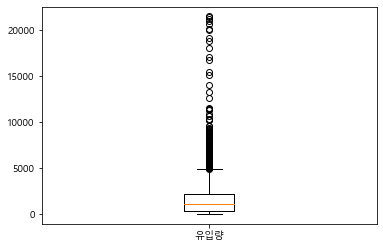

In [ ]:
plt.boxplot(df1['유입량'])
plt.xticks([1], ['유입량'])
plt.show()

## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=60, max_samples=50, contamination=float(0.004), 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=None, verbose=0,behaviour="new")

# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출.
clf.fit(df1)
pred = clf.predict(df1)
df1['anomaly']=pred
outliers=df1.loc[df1['anomaly']==-1]
outlier_index=list(outliers.index)

#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df1['anomaly'].value_counts())

 1    2879
-1      12
Name: anomaly, dtype: int64


In [ ]:
# isolation forest 이상치 제거
df=df.drop([df.index[154],df.index[155],df.index[156],df.index[157],df.index[158],df.index[159],df.index[160],df.index[161],df.index[162],df.index[163],df.index[164],df.index[165]])
df

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1 유역평균강수,데이터집단 1 강우(A지역),데이터집단 1 강우(B지역),데이터집단 1 강우(C지역),...,데이터집단 5 강우(D지역),데이터집단 5 수위(E지역),데이터집단 5 수위(D지역),데이터집단 6 유역평균강수,데이터집단 6 강우(A지역),데이터집단 6 강우(B지역),데이터집단 6 강우(C지역),데이터집단 6 강우(D지역),데이터집단 6 수위(E지역),데이터집단 6 수위(D지역)
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7.0,7.0,7.0,...,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7.0,8.0,7.0,...,10.0,2.53,122.648,7.3000,7.0,8.0,10.0,10.0,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7.0,9.0,7.0,...,11.0,2.53,122.636,8.2000,7.0,9.0,10.0,11.0,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7.0,10.0,7.0,...,14.0,2.53,122.620,11.3000,9.0,10.0,15.0,14.0,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7.0,12.0,8.0,...,16.0,2.53,122.604,14.4000,12.0,12.0,18.0,16.0,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25.0,2017.0,7.0,18.0,18.0,513.368437,22.7836,6.0,0.0,1.0,...,1.0,3.03,137.088,1.7366,6.0,0.0,1.0,1.0,3.03,137.130
2887,25.0,2017.0,7.0,18.0,19.0,502.846843,8.2586,2.0,0.0,1.0,...,1.0,3.00,137.104,1.7366,2.0,0.0,1.0,1.0,3.00,137.145
2888,25.0,2017.0,7.0,18.0,20.0,491.954805,4.1089,1.0,0.0,1.0,...,1.0,2.98,137.120,1.7366,1.0,0.0,1.0,1.0,2.98,137.155
2889,25.0,2017.0,7.0,18.0,21.0,481.103083,3.3854,1.0,0.0,1.0,...,1.0,2.96,137.136,1.7366,1.0,0.0,1.0,1.0,2.96,137.165


## 다중공선성 확인

In [ ]:
df_x = df.drop(['홍수사상번호', '연', '월', '일', '시간', '유입량'], axis=1)
df_y = df.loc[:,['유입량']]

In [ ]:

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(df_x.values,i) for i in range(df_x.shape[1])]
vif['features']=df_x.columns
#vif.sort_values(by=['VIF Factor'], axis=0, ascending=False) #내림차순 
vif

,VIF Factor,features
0,3.482689e+03,데이터집단 1 유역평균강수
1,3.663488e+02,데이터집단 1 강우(A지역)
2,1.837842e+03,데이터집단 1 강우(B지역)
3,1.669843e+02,데이터집단 1 강우(C지역)
4,inf,데이터집단 1 강우(D지역)
5,inf,데이터집단 1 수위(E지역)
6,2.458604e+08,데이터집단 1 수위(D지역)
7,inf,데이터집단 2 유역평균강수
8,inf,데이터집단 2 강우(A지역)
9,2.143021e+03,데이터집단 2 강우(B지역)


## train test 데이터 분할

In [ ]:
#홍수 사상번호 별 데이터 개수 확인 
for i in range(1,26):
  print('홍수 사상 번호:', i , '데이터 개수:', len(df[df.홍수사상번호 == i]))

홍수 사상 번호: 1 데이터 개수: 214
홍수 사상 번호: 2 데이터 개수: 100
홍수 사상 번호: 3 데이터 개수: 81
홍수 사상 번호: 4 데이터 개수: 34
홍수 사상 번호: 5 데이터 개수: 94
홍수 사상 번호: 6 데이터 개수: 46
홍수 사상 번호: 7 데이터 개수: 51
홍수 사상 번호: 8 데이터 개수: 41
홍수 사상 번호: 9 데이터 개수: 68
홍수 사상 번호: 10 데이터 개수: 86
홍수 사상 번호: 11 데이터 개수: 110
홍수 사상 번호: 12 데이터 개수: 127
홍수 사상 번호: 13 데이터 개수: 67
홍수 사상 번호: 14 데이터 개수: 50
홍수 사상 번호: 15 데이터 개수: 262
홍수 사상 번호: 16 데이터 개수: 205
홍수 사상 번호: 17 데이터 개수: 125
홍수 사상 번호: 18 데이터 개수: 65
홍수 사상 번호: 19 데이터 개수: 95
홍수 사상 번호: 20 데이터 개수: 264
홍수 사상 번호: 21 데이터 개수: 84
홍수 사상 번호: 22 데이터 개수: 285
홍수 사상 번호: 23 데이터 개수: 128
홍수 사상 번호: 24 데이터 개수: 94
홍수 사상 번호: 25 데이터 개수: 103


In [ ]:
# train set, test set 분할 
# train 홍수 사상 번호: 1 ~ 21
# test 홍수 사상 번호: 22, 23, 24, 25
x_train, x_test, y_train, y_test = df_x.iloc[:-610], df_x.iloc[-610:], df_y.iloc[:-610], df_y.iloc[-610:]

# train set, test set 분할 후 shape 
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (2269, 42) y_train: (2269, 1)
x_test: (610, 42) y_test: (610, 1)


## loss 측정 함수

In [ ]:
#loss 측정 함수 
def regression_results(y_true, y_pred): 
  mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
  mse=metrics.mean_squared_error(y_true, y_pred) 

  print('MSE: ', round(mse,4)) 
  print('RMSE: ', round(np.sqrt(mse),4))

## Polynomial regression PCA (X)

In [ ]:
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ('poly', PolynomialFeatures()),
    ("model", LinearRegression())
])

param_grid = {
    "poly__degree" : np.arange(1,4),  #n차원 변수 만들기
    "model__fit_intercept" : [True, False] #모형에 상수항이 있는지 없는지 

}

gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=10)

gs.fit(x_train, y_train)

print(gs.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs.predict(x_test)
regression_results(y_true, y_pred)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0250s.) Setting batch_size=14.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    1.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    1.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   14.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   16.2s remaining:    3.2s


{'model__fit_intercept': True, 'poly__degree': 1}
------------------------------------------------------------------------
train_loss
MSE:  466422.6161
RMSE:  682.9514
------------------------------------------------------------------------
test_loss
MSE:  561342.499
RMSE:  749.2279


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   16.6s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Polynomial regression PCA (O)

In [ ]:
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("pca", PCA()),
    ('poly', PolynomialFeatures()),
    ("model", LinearRegression())
])

param_grid = {
    "pca__n_components" : np.arange(1,43),
    "poly__degree" : np.arange(1,4),  
    "model__fit_intercept" : [True, False] 

}

gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=10)

gs.fit(x_train, y_train)

print(gs.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs.predict(x_test)
regression_results(y_true, y_pred)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0407s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4982s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (47.8284s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Batch computation too slow (37.9297s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 398

{'model__fit_intercept': False, 'pca__n_components': 10, 'poly__degree': 2}
------------------------------------------------------------------------
train_loss
MSE:  129649.5113
RMSE:  360.0688
------------------------------------------------------------------------
test_loss
MSE:  382903.5718
RMSE:  618.792


[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed:  4.9min finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 릿지 PCA(X)

In [ ]:
pipe = Pipeline([
        ('scalar', MinMaxScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        ("model", Ridge()),
    ])
param_grid = {
    "poly__degree" : np.arange(1,4),  
    'model__alpha': np.arange(0, 0.2, 0.05)    
}
gs = GridSearchCV(pipe, param_grid=param_grid, cv=2, n_jobs=-1, verbose=10)

gs.fit(x_train, y_train)

print(gs.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs.predict(x_test)
regression_results(y_true, y_pred)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  13 out of  24 | elapsed:    0.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  24 | elapsed:    2.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.8s finished


{'model__alpha': 0.15000000000000002, 'poly__degree': 2}
------------------------------------------------------------------------
train_loss
MSE:  115521.6879
RMSE:  339.8848
------------------------------------------------------------------------
test_loss
MSE:  358057.0085
RMSE:  598.3786


## 릿지 PCA(O)

In [ ]:
pipe = Pipeline([
        ('scalar', MinMaxScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('pca',PCA()),
        ("model", Ridge( solver="cholesky")), #solver="cholesky" 행렬분해를 이용해 정규방정식의 해를 구하는데 유용 #solver='sag' 확률적 평균 경사하강법(Stochastic Average Gradient Descent 
    ])
param_grid = {
    "pca__n_components" : np.arange(1,43),
    "poly__degree" : np.arange(1,4), 
    'model__alpha': np.arange(0, 0.2, 0.05)    
}
gs = GridSearchCV(pipe, param_grid=param_grid, cv=2, n_jobs=-1, verbose=10)

gs.fit(x_train, y_train)

print(gs.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs.predict(x_test)
regression_results(y_true, y_pred)

Fitting 2 folds for each of 504 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0350s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (34.3526s.) Setting batch_size=5.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Batch computation too slow (65.2576s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Batch computation too slow (28.9569s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 315 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 355 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3

{'model__alpha': 0.15000000000000002, 'pca__n_components': 24, 'poly__degree': 2}
------------------------------------------------------------------------
train_loss
MSE:  198319.5567
RMSE:  445.3308
------------------------------------------------------------------------
test_loss
MSE:  349246.1626
RMSE:  590.9705


## Lasso PCA(X)

In [ ]:
pipe= Pipeline([
                ('scalar', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                 ('model', Lasso())
])

param_grid = {
    "poly__degree" : np.arange(1,4),
    "model__tol" : np.logspace(-5,0,10) ,
    "model__alpha" : np.logspace(-5,1,10), 
    
}
gs = GridSearchCV(pipe, param_grid=param_grid, cv=2, n_jobs=-1, verbose=10)

gs.fit(x_train, y_train)

print(gs.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs.predict(x_test)
regression_results(y_true, y_pred)

Fitting 2 folds for each of 300 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1480s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (6.7577s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:  4.2min
[Parallel(n_j

{'model__alpha': 0.46415888336127725, 'model__tol': 1e-05, 'poly__degree': 2}
------------------------------------------------------------------------
train_loss
MSE:  147197.474
RMSE:  383.6632
------------------------------------------------------------------------
test_loss
MSE:  314975.7627
RMSE:  561.227


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17648227.512717783, tolerance: 117970.63358760982
  positive)


## Lasso PCA(O)

In [ ]:
pipe= Pipeline([
                ('scalar', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                ('pca', PCA()),
                ('model', Lasso())
])

param_grid = {
    "pca__n_components" : np.arange(1,43),
    "poly__degree" : np.arange(1,3),
    "model__tol" : np.logspace(-5,0,10) ,
    "model__alpha" : np.logspace(-5,1,10), 
    
}
gs = GridSearchCV(pipe, param_grid=param_grid, cv=2, n_jobs=-1, verbose=10)

gs.fit(x_train, y_train)

print(gs.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs.predict(x_test)
regression_results(y_true, y_pred)

Fitting 2 folds for each of 8400 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 9361 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 9498 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 9637 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 9917 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 10058 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 10201 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 10344 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 10489 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 10634 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 10781 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 10928 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 11077 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 11226 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 11377 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 11528 tasks      

{'model__alpha': 4.641588833612782e-05, 'model__tol': 0.07742636826811278, 'pca__n_components': 24, 'poly__degree': 2}
------------------------------------------------------------------------
train_loss
MSE:  198316.9592
RMSE:  445.3279
------------------------------------------------------------------------
test_loss
MSE:  350032.7534
RMSE:  591.6357


## Random forest PCA(X)

In [ ]:
def gs_randomforest(x_train, y_train, model__n_estimators, model__n_jobs, model__random_state, model__max_depth, model__max_features):
  pipe = Pipeline([
      ("scaler", MinMaxScaler()),
      ("pca", PCA()),
      ("model", RandomForestRegressor())
  ])

  param_grid = {
      "model__n_estimators": model__n_estimators,
      "model__n_jobs": model__n_jobs,
      "model__random_state": model__random_state,
      "model__max_depth": model__max_depth,
      "model__max_features": model__max_features,
  }

  gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=10)

  gs.fit(x_train, y_train)

  return gs

model__n_estimators = [25,50,100]
model__max_depth = [10,20,30]
model__max_features = [0.242801]
model__n_jobs = [-1]
model__random_state = [50]

gs_RF3 = gs_randomforest(x_train, y_train, 
                        model__n_estimators = model__n_estimators, 
                        model__n_jobs = model__n_jobs,
                        model__random_state = model__random_state, 
                        model__max_depth = model__max_depth, 
                        model__max_features = model__max_features)

print(gs_RF3.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs_RF3.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs_RF3.predict(x_test)
regression_results(y_true, y_pred)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  27 | elapsed:    0.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  13 out of  27 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed:    1.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  19 out of  27 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  27 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.5s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'model__max_depth': 30, 'model__max_features': 0.242801, 'model__n_estimators': 100, 'model__n_jobs': -1, 'model__random_state': 50}
------------------------------------------------------------------------
train_loss
MSE:  28711.5891
RMSE:  169.4449
------------------------------------------------------------------------
test_loss
MSE:  1082198.24
RMSE:  1040.2876


## Random forest PCA(O)

In [ ]:
def gs_randomforest(x_train, y_train, pca__n_components, model__n_estimators, model__n_jobs, model__random_state, model__max_depth, model__max_features):
  pipe = Pipeline([
      ("scaler", MinMaxScaler()),
      ("pca", PCA()),
      ("model", RandomForestRegressor())
  ])

  param_grid = {
      "pca__n_components" : pca__n_components,
      "model__n_estimators": model__n_estimators,
      "model__n_jobs": model__n_jobs,
      "model__random_state": model__random_state,
      "model__max_depth": model__max_depth,
      "model__max_features": model__max_features,
  }

  gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=10)

  gs.fit(x_train, y_train)

  return gs

pca__n_components = [5,10,15,20,25,30,35,40]
model__n_estimators = [25,50,100]
model__max_depth = [10,20,30]
model__max_features = [0.242801]
model__random_state = [50]
model__n_jobs = [-1]

gs_RF3 = gs_randomforest(x_train, y_train, 
                        pca__n_components = pca__n_components, 
                        model__n_estimators = model__n_estimators, 
                        model__n_jobs = model__n_jobs,
                        model__random_state = model__random_state, 
                        model__max_depth = model__max_depth, 
                        model__max_features = model__max_features)


print(gs_RF3.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs_RF3.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs_RF3.predict(x_test)
regression_results(y_true, y_pred)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  

{'model__max_depth': 20, 'model__max_features': 0.242801, 'model__n_estimators': 100, 'model__n_jobs': -1, 'model__random_state': 50, 'pca__n_components': 30}
------------------------------------------------------------------------
train_loss
MSE:  26291.8757
RMSE:  162.1477
------------------------------------------------------------------------
test_loss
MSE:  993687.7571
RMSE:  996.8389


## Pipe line ANN

PCA 적용 X

Scaler 종류: minmaxscaler

units 개수: 42,21,10

activation: relu

optimizer adam

epochs: [50, 100, 150]

batch_size: [8, 16, 32]

learning_rate : [0.1, 0.01, 0.001]

In [ ]:
def ANN_n(units_num, learning_rate):
  model = Sequential()

  for units in units_num:
      model.add(Dense(units = units, kernel_initializer = 'uniform', activation = 'relu'))
      
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
  model.compile(optimizer =  Adam(learning_rate = learning_rate), loss = 'mse')
  return model

def gs_ANN_n(model, x_train, y_train, model__units_num, model__epochs, model__batch_size, model__learning_rate):
  model = KerasRegressor(build_fn=model,verbose=0)

  pipe = Pipeline([
      ("scaler", MinMaxScaler()),
      ("model", model)
  ])

  param_grid = {
      "model__units_num" : model__units_num,
      "model__epochs": model__epochs,
      "model__batch_size": model__batch_size,
      "model__learning_rate": model__learning_rate
  }

  gs = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs= -1, verbose=10)

  gs.fit(x_train, y_train)

  return gs

model__batch_size = [8, 16, 32]
model__epochs = [50, 100, 150]
model__learning_rate = [0.1, 0.01, 0.001]

#model__units_num_w_list 생성 
layer1_w = [42, 21]
layer2_w = [42, 21, 10]
layer3_w = [42, 21, 10]
model__units_num = []

for l1_w in layer1_w:
  for l2_w in layer2_w:
    for l3_w in layer3_w:
      if l2_w == 0 and l3_w != 0:
        pass

      else:
        model__units_num.append([l1_w, l2_w, l3_w])

gs_ANN_n =  gs_ANN_n(ANN_n, x_train, y_train, 
                   model__units_num = model__units_num, 
                   model__epochs = model__epochs, 
                   model__batch_size = model__batch_size,
                   model__learning_rate = model__learning_rate
                   )

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

In [ ]:
print(gs_ANN_n.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs_ANN_n.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs_ANN_n.predict(x_test)
regression_results(y_true, y_pred)

{'model__batch_size': 8, 'model__epochs': 100, 'model__learning_rate': 0.01, 'model__units_num': [42, 42, 10]}
------------------------------------------------------------------------
train_loss
MSE:  132741.9509
RMSE:  364.3377
------------------------------------------------------------------------
test_loss
MSE:  376223.6484
RMSE:  613.3707


## Pipe line ANN

PCA 적용 O

Scaler 종류: minmaxscaler

PCA 개수: 27(linear regression에서 최적값)

units 개수: 27, 13, 7

activation: relu

optimizer adam

epochs: [50, 100, 150]

batch_size: [8, 16, 32]

learning_rate : [0.1, 0.01, 0.001]

In [ ]:
#LinearRegression

pipe = Pipeline([
    ("pca", PCA()),
    ("model", LinearRegression())
])

param_grid = {
    "pca__n_components" : np.arange(1,43)

}

gs = GridSearchCV(pipe, param_grid=param_grid, cv=2, n_jobs=-1, verbose=10)

gs.fit(x_train, y_train)

print(gs.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs.predict(x_test)
regression_results(y_true, y_pred)

Fitting 2 folds for each of 42 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0290s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   7 out of  84 | elapsed:    0.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  16 out of  84 | elapsed:    0.0s remaining:    0.4s


{'pca__n_components': 27}
------------------------------------------------------------------------
train_loss
MSE:  466454.9754
RMSE:  682.9751
------------------------------------------------------------------------
test_loss
MSE:  560829.0606
RMSE:  748.8852


[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.3s finished


In [ ]:
#ANN

def ANN1(units_num, learning_rate):
  model = Sequential()

  for units in units_num:
      model.add(Dense(units = units, kernel_initializer = 'uniform', activation = 'relu'))
      
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
  model.compile(optimizer =  Adam(learning_rate = learning_rate), loss = 'mse')
  return model

def gs_ANN1(model, x_train, y_train, pca__n_components, model__units_num, model__epochs, model__batch_size, model__learning_rate):
  model = KerasRegressor(build_fn=model,verbose=0)

  pipe = Pipeline([
      ("scaler", MinMaxScaler()),
      ("pca", PCA()),
      ("model", model)
  ])

  param_grid = {
      "pca__n_components" : pca__n_components,
      "model__units_num" : model__units_num,
      "model__epochs": model__epochs,
      "model__batch_size": model__batch_size,
      "model__learning_rate": model__learning_rate
  }

  gs = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs= -1, verbose=10)

  gs.fit(x_train, y_train)

  return gs

pca__n_components = [27]
model__batch_size = [8, 16, 32]
model__epochs = [50, 100, 150]
model__learning_rate = [0.1, 0.01, 0.001]

#model__units_num_w_list 생성 
layer1_w = [27, 13]
layer2_w = [27, 13]
layer3_w = [27, 13, 7]
model__units_num = []

for l1_w in layer1_w:
  for l2_w in layer2_w:
    for l3_w in layer3_w:
      if l2_w == 0 and l3_w != 0:
        pass

      else:
        model__units_num.append([l1_w, l2_w, l3_w])

gs_ANN1 =  gs_ANN1(ANN1, x_train, y_train, 
                   pca__n_components =pca__n_components, 
                   model__units_num = model__units_num, 
                   model__epochs = model__epochs, 
                   model__batch_size = model__batch_size,
                   model__learning_rate = model__learning_rate
                   )

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

In [ ]:
print(gs_ANN1.best_params_)
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = gs_ANN1.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = gs_ANN1.predict(x_test)
regression_results(y_true, y_pred)

{'model__batch_size': 8, 'model__epochs': 150, 'model__learning_rate': 0.001, 'model__units_num': [27, 13, 7], 'pca__n_components': 27}
------------------------------------------------------------------------
train_loss
MSE:  122475.8217
RMSE:  349.9655
------------------------------------------------------------------------
test_loss
MSE:  216239.0463
RMSE:  465.0151


## 최종모델 선정

ANN + MinMaxScaler + PCA

Scaler 종류: minmaxscaler

PCA 개수: 27(linear regression에서 나온 값)

units: 27, 13, 7, 1

activation: relu

optimizer adam

epochs: 150

batch_size: 8

learning_rate : 0.001

In [ ]:
def ANN():
  model = Sequential()

  model.add(Dense(units = 27, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

  model.compile(optimizer =  Adam(learning_rate = 0.001), loss = 'mse')
  return model

model = KerasRegressor(ANN, batch_size = 8, epochs = 150, verbose=0)

final_model = Pipeline([
                        ("scaler", MinMaxScaler()),
                        ("pca", PCA(27)),
                        ("model", model)
                      ])

final_model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=27,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A388160208>)],
         verbose=False)

In [ ]:
print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = final_model.predict(x_train)
regression_results(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = final_model.predict(x_test)
regression_results(y_true, y_pred)

------------------------------------------------------------------------
train_loss
MSE:  125778.1528
RMSE:  354.6522
------------------------------------------------------------------------
test_loss
MSE:  211806.3499
RMSE:  460.2242


#### 홍수 사상 번호: 22

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


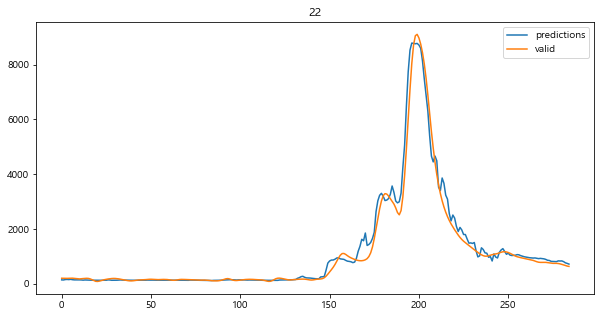

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(y_pred[:285]))
plt.plot(list(y_true['유입량'][:285]))
plt.title('22')

plt.legend(['predictions', 'valid'], loc = 'low')

#### 홍수 사상 번호: 23

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


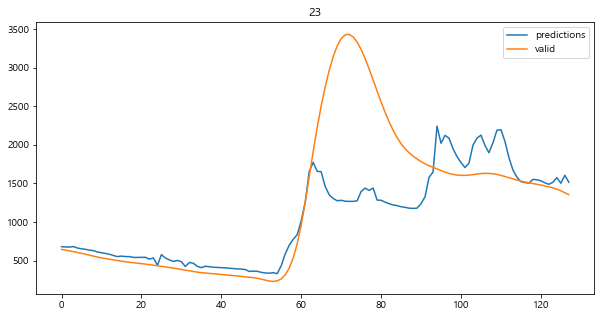

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(y_pred[285:413]))
plt.plot(list(y_true['유입량'][285:413]))

plt.title('23')
plt.legend(['predictions', 'valid'], loc = 'low')

#### 홍수 사상 번호: 24

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


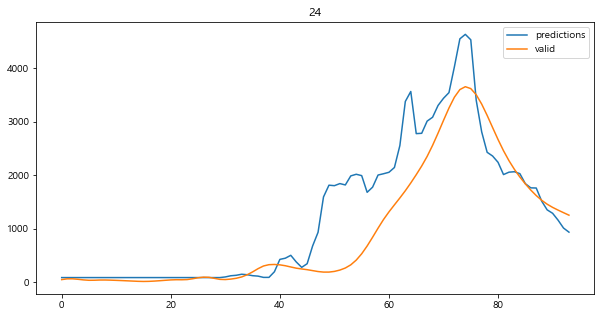

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(y_pred[413:507]))
plt.plot(list(y_true['유입량'][413:507]))

plt.title('24')
plt.legend(['predictions', 'valid'], loc = 'low')

#### 홍수 사상 번호: 25

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


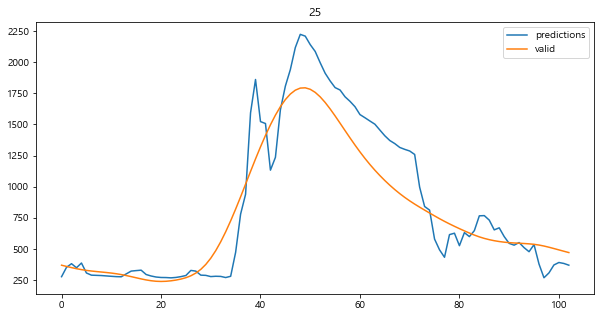

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(y_pred[507:]))
plt.plot(list(y_true['유입량'][507:]))

plt.title('25')
plt.legend(['predictions', 'valid'], loc = 'low')

## CONCL

#### 전체 데이터 학습 

In [ ]:
df_y

,유입량
0,189.100000
1,216.951962
2,251.424419
3,302.812199
4,384.783406
...,...
2886,513.368437
2887,502.846843
2888,491.954805
2889,481.103083


In [ ]:
def ANN():
  model = Sequential()

  model.add(Dense(units = 27, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

  model.compile(optimizer =  Adam(learning_rate = 0.001), loss = 'mse')
  return model

model = KerasRegressor(ANN, batch_size = 8, epochs = 150, verbose=0)

final_model = Pipeline([
                        ("scaler", MinMaxScaler()),
                        ("pca", PCA(27)),
                        ("model", model)
                      ])

final_model.fit(df_x, df_y)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=27,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A389483708>)],
         verbose=False)

In [ ]:
print('train_loss')
y_true = df_y
y_pred = final_model.predict(df_x)
regression_results(y_true, y_pred)

train_loss
MSE:  119208.8477
RMSE:  345.2663


#### 홍수 사상 번호 26 데이터

In [ ]:
val_df = pd.read_excel('제공데이터.xlsx')
val_df = val_df[val_df.홍수사상번호 == 26]
val_df_x = val_df.drop(['홍수사상번호', '연', '월', '일', '시간', '유입량'], axis=1)

In [ ]:
val_df

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1 유역평균강수,데이터집단 1 강우(A지역),데이터집단 1 강우(B지역),데이터집단 1 강우(C지역),...,데이터집단 5 강우(D지역),데이터집단 5 수위(E지역),데이터집단 5 수위(D지역),데이터집단 6 유역평균강수,데이터집단 6 강우(A지역),데이터집단 6 강우(B지역),데이터집단 6 강우(C지역),데이터집단 6 강우(D지역),데이터집단 6 수위(E지역),데이터집단 6 수위(D지역)
2892,26.0,2018.0,7.0,1.0,6.0,NaN,14.2576,32.0,0.0,0.0,...,0.0,1.93,120.528,0.8413,32.0,0.0,1.0,0.0,1.93,120.515
2893,26.0,2018.0,7.0,1.0,7.0,NaN,10.9657,20.0,1.0,0.0,...,8.0,1.93,120.524,4.7653,21.0,1.0,14.0,8.0,1.93,120.510
2894,26.0,2018.0,7.0,1.0,8.0,NaN,7.9442,11.0,5.0,0.0,...,24.0,1.92,120.520,12.9398,21.0,5.0,19.0,24.0,1.92,120.505
2895,26.0,2018.0,7.0,1.0,9.0,NaN,7.8916,3.0,11.0,0.0,...,33.0,1.92,120.516,19.6616,18.0,11.0,22.0,33.0,1.92,120.500
2896,26.0,2018.0,7.0,1.0,10.0,NaN,13.3484,4.0,25.0,1.0,...,36.0,1.92,120.512,26.6211,20.0,25.0,23.0,36.0,1.92,120.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1.0,0.0,0.0,...,0.0,3.16,129.916,2.1722,1.0,0.0,0.0,0.0,3.16,129.950
3048,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1.0,0.0,0.0,...,0.0,3.15,129.928,2.0805,1.0,0.0,0.0,0.0,3.15,129.970
3049,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1.0,0.0,0.0,...,0.0,3.13,129.940,2.0354,1.0,0.0,0.0,0.0,3.13,129.980
3050,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1.0,0.0,0.0,...,0.0,3.11,129.952,1.8993,1.0,0.0,0.0,0.0,3.11,129.990


#### 홍수 사상 번호: 26 예측 결과

In [ ]:
y_pred = final_model.predict(val_df_x)

In [ ]:
y_pred

array([ 129.24643,  170.72517,  288.796  ,  395.24426,  482.69534,
        433.36685,  353.50812,  373.6683 ,  388.12085,  417.78534,
        553.2909 ,  656.06915,  743.4536 ,  840.06866,  765.0196 ,
        814.1676 ,  837.3131 ,  831.32495,  896.6825 ,  962.06915,
       1146.8007 , 1428.3364 , 1719.985  , 1821.6747 , 1807.5198 ,
       2115.9036 , 2427.9146 , 2748.4214 , 2658.2454 , 2403.5125 ,
       2379.7354 , 2461.7683 , 2677.459  , 2865.2698 , 2900.7593 ,
       2923.9653 , 2747.9697 , 2647.4631 , 2402.387  , 2251.514  ,
       2156.656  , 2127.0166 , 1972.3217 , 1851.5308 , 1800.4679 ,
       1696.1716 , 1630.3005 , 1562.3668 , 1552.4198 , 1514.164  ,
       1502.3679 , 1401.5942 , 1299.1659 , 1270.286  , 1295.0432 ,
       1266.8939 , 1258.526  , 1257.4551 , 1249.154  , 1183.8795 ,
       1075.9974 , 1036.9941 ,  930.9236 ,  837.8199 ,  837.99097,
        813.5887 ,  831.8892 ,  857.9951 ,  817.3248 ,  745.37805,
        746.3595 ,  785.53424,  753.63293,  708.5313 ,  676.55

Text(0.5, 1.0, '26')

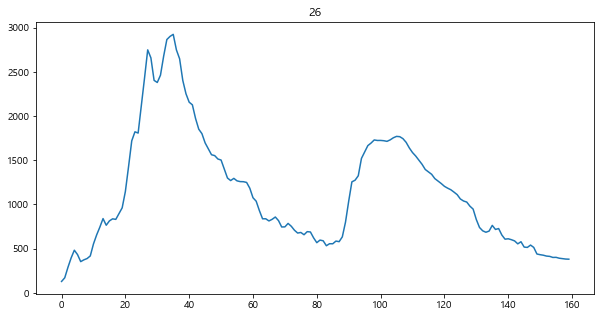

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.title('26')

#### 결과 저장

In [ ]:
concl_df = pd.read_excel('평가데이터.xlsx')
concl_df = concl_df.drop(index=0, axis=0).reset_index(drop=True)
concl_df['유입량'] = y_pred

In [ ]:
concl_df.to_excel("최종예측데이터.xlsx")